In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
header_names = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age in days','Concrete compressive strength']

df = pd.read_csv('./dataset/Concrete_Data.csv',header=0, skipinitialspace=True, names=header_names)
print(df.tail())
X = df[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age in days']]
y = df['Concrete compressive strength']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age in days  \
1025             870.1           768.3           28   
1026             817.9           813.4           28   
1027             892.4           780.0           28   
1028             989.6           788.9           28   
1029             864.5           761.5           28   

      Concrete compressive strength  
1025                      44.284354  
1026                      31.178794  
1027                      23.696601  
1028                      32.768036  
1029                      32.401235  


In [24]:
df1 = pd.read_csv('./dataset/Concrete_Data.csv', header=0, skipinitialspace=True, names=header_names)
df1.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age in days,Concrete compressive strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [25]:
df1.isna().sum()             #to check if anny columsn in df1 has missing values
print(df1.isna().sum())
df1 = df1.dropna()           #to drop any columns with missing values

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age in days                      0
Concrete compressive strength    0
dtype: int64


In [26]:
y = df1['Concrete compressive strength']
X = df1.drop('Concrete compressive strength', axis =1)
print(y.head())
print(X.head())
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength, dtype: float64
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age in days  
0            1040.0           676.0           28  
1            1055.0           676.0           28  
2             932.0           594.0          270  
3             932.0           594.0          365  
4             978.4           825.5          360  


In [7]:
model = models.Sequential()
model.add(tf.keras.Input(shape=[X.shape[1]]))#input = number of features = 7
model.add(layers.Dense(64, activation='relu')) #input_shape=[7]
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary() #print the hidden and output layers
#go through the values in the summary table

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [8]:
optimizer = tf.keras.optimizers.Adam(0.001)
#mean_squared_error, mse
#default value of earning rate in Adam is 0.001
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

In [9]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [10]:
early_history = model.fit(X_train, y_train, 
                    epochs=2000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop])

ehistory = pd.DataFrame(early_history.history)
ehistory.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
184,20.121651,3.371335,20.121651,33.285648,4.374663,33.285648
185,20.112579,3.386626,20.112579,32.477509,4.350358,32.477509
186,19.963364,3.400117,19.963364,32.817623,4.303527,32.817623
187,20.623339,3.480589,20.623339,32.464378,4.233205,32.464378
188,19.627707,3.395802,19.627707,32.818527,4.320356,32.818527


7/7 [==============================] - 0s 1ms/step - loss: 38.4794 - mae: 4.6640 - mse: 38.4794
Model score: [38.47938919067383, 4.6639933586120605, 38.47938919067383]


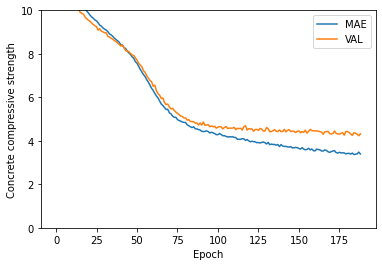

In [11]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Model score:", score)

ehistory['epoch'] = early_history.epoch

plt.plot(ehistory['epoch'], ehistory['mae'], label='MAE')
plt.plot(ehistory['epoch'], ehistory['val_mae'], label='VAL')
plt.xlabel('Epoch')
plt.ylim([0, 10])
plt.ylabel('Concrete compressive strength')
plt.legend()
plt.show()

In [21]:
alldata = pd.DataFrame()

result = model.predict(X_test)
#print(result.shape)

r2_value = 0

alldata['actual'] = y_test
alldata['predicted'] = result

r2_value = r2_score(alldata['actual'], alldata['predicted'])

print(alldata.shape)
print(alldata)
print('R-squared Coefficient of determination: %.2f'
      %r2_value)

(206, 2)
        actual  predicted
31   52.908320  42.330936
109  55.895819  44.383377
136  74.497882  68.942398
88   35.301171  40.488720
918  10.535193  10.693653
..         ...        ...
482  56.144031  56.237072
545  18.746163  22.281519
110  37.997022  47.871693
514  74.364911  67.907379
602  35.170171  36.529392

[206 rows x 2 columns]
R-squared Coefficient of determination: 0.85
